# Lab 5 - General Linear Models: Logistic regression

In [12]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

#### Read data from csv file

In [13]:
data = pd.read_csv("logistic_reg_data.csv")
data.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,y
count,500.000000,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000
mean,249.500000,-0.015777,0.334002,-0.001484,2.022817e-01,2.770684e-03,0.494000
std,144.481833,0.578292,0.301507,0.383111,2.738984e-01,3.107472e-01,0.500465
min,0.000000,-0.997592,0.000005,-0.992794,2.276756e-11,-9.880191e-01,0.000000
25%,124.750000,-0.515144,0.064052,-0.136718,4.102616e-03,-3.628888e-02,0.000000
50%,249.500000,-0.026042,0.254724,-0.000018,6.488454e-02,-1.278838e-08,0.000000
75%,374.250000,0.475396,0.555544,0.107440,3.086316e-01,2.428165e-02,1.000000
max,499.000000,0.999652,0.999305,0.998957,9.986100e-01,9.982628e-01,1.000000


### Prior selection


In [14]:
model_ppc1 = CmdStanModel(stan_file='logistic_regression_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [15]:
R=1000
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=10)
sim_ppc1=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


#### Task 1.

1. Plot histograms of beta for prior model
2. Plot again the same histograms but this time with other sigma values. For instace use values: 5, 2, 0.75.
3. Consider which result should be taken into account when selecting prior.

In [16]:
sim_ppc1.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.000,NaN,0.00,0.000000e+00,0.000,0.00,NaN,NaN,NaN
prob_ppc[1],0.520,0.016,0.46,5.700000e-08,0.580,1.00,795.0,2086.00,1.0
prob_ppc[2],0.510,0.015,0.48,4.900000e-14,0.680,1.00,999.0,2621.00,1.0
prob_ppc[3],0.540,0.016,0.49,0.000000e+00,0.950,1.00,945.0,2480.00,1.0
prob_ppc[4],0.530,0.015,0.49,0.000000e+00,0.920,1.00,1015.0,2665.00,1.0
...,...,...,...,...,...,...,...,...,...
beta[2],-0.670,0.300,9.80,-1.700000e+01,-0.670,16.00,1078.0,2830.00,1.0
beta[3],-0.048,0.310,10.00,-1.600000e+01,-0.026,17.00,1054.0,2766.00,1.0
beta[4],0.520,0.320,10.00,-1.600000e+01,0.460,17.00,979.0,2569.00,1.0


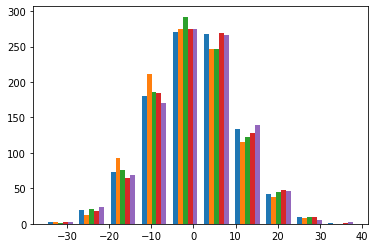

In [17]:
beta = sim_ppc1.stan_variable("beta")
plt.hist(beta);

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


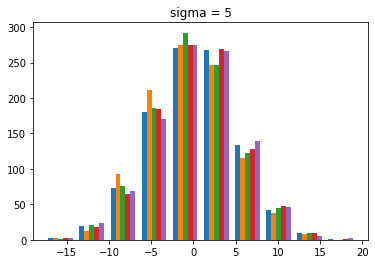

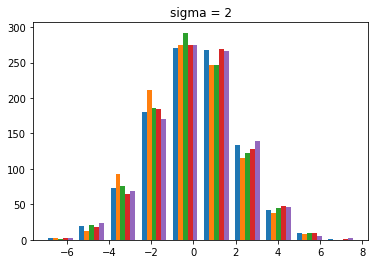

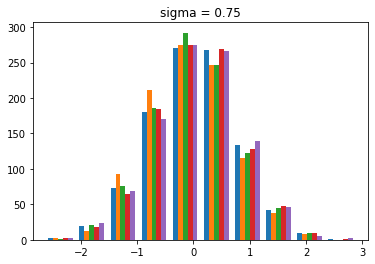

In [18]:
for counter, sigma_val in enumerate([5, 2, 0.75], 1):
    R=1000
    data_ppc= dict(N = data.shape[0],
                    M = 5,
                    X = data.iloc[:,0:5].values,
                    sigma=sigma_val);
    sim_ppc1=model_ppc1.sample(data=data_ppc, 
                            iter_sampling=R, iter_warmup=0, 
                            chains=1, 
                            refresh=R,
                            fixed_param=True,
                            seed=29042020);
    beta = sim_ppc1.stan_variable("beta")
    plt.figure(counter)
    plt.title(f"sigma = {sigma_val}")
    plt.hist(beta);

### Posterior inference

In [19]:
model = CmdStanModel(stan_file='logistic_regression.stan');

INFO:cmdstanpy:found newer exe file, not recompiling


In [20]:
data_dict = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 y = data.y.values
                 )
fit = model.sample(data=data_dict, seed=4938483)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |█▎        | 00:05 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:05 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:06 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:06 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:06 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:06 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |████      | 00:06 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:07 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:07 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:07 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:08 Iteration: 1300 / 2000 [


INFO:cmdstanpy:CmdStan done processing.


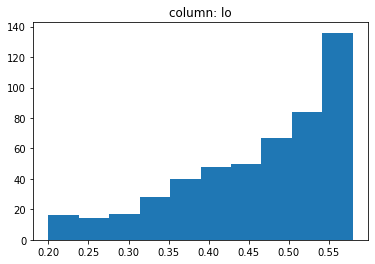

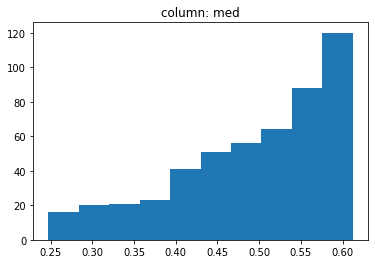

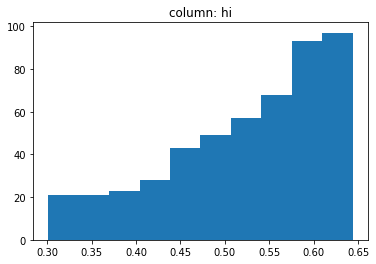

In [21]:
med_prob_ppc = np.percentile(fit.stan_variable('prob_ppc'),[25,50,75],axis=0)
estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','med','hi'])
for counter, column in enumerate(estimate_ppc_df.columns):
    plt.figure(counter)
    plt.title(f"column: {column}")
    plt.hist(estimate_ppc_df[column])

#### Task 2.

1. Edit stan model and create models with different priors. Use original setting and some priors from task 1.
2. Fit the model
3. Plot the probability of individual outcome:
- plot generated paramether theta (prob_pcc): mean with its error bars (plt.errorbar)
- to plot its error bars take into consider its 25th, 50th and 75th percentile
- also mark the real value of y, by different colored dots (for mean values)
    
4. Consider if the probability was well captured by each setting

In [23]:
model2 = CmdStanModel(stan_file='logistic_regression_2.stan')

INFO:cmdstanpy:compiling stan file E:\uczelnia\ISZ\semestr1\data_analytics\lab5_general_linear_models\logistic_regression_2.stan to exe file E:\uczelnia\ISZ\semestr1\data_analytics\lab5_general_linear_models\logistic_regression_2.exe
INFO:cmdstanpy:compiled model executable: E:\uczelnia\ISZ\semestr1\data_analytics\lab5_general_linear_models\logistic_regression_2.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=E:/uczelnia/ISZ/semestr1/data_analytics/lab5_general_linear_models/logistic_regression_2.hpp E:/uczelnia/ISZ/semestr1/data_analytics/lab5_general_linear_models/logistic_regression_2.stan
Warning in 'E:/uczelnia/ISZ/semestr1/data_analytics/lab5_general_linear_models/logistic_regression_2.stan', line 5, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning i

In [24]:
data_dict = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 y = data.y.values
                 )
fit2 = model2.sample(data=data_dict, seed=4938483)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status



chain 1 |▉         | 00:03 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:04 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:05 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:05 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:05 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:06 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |███▋      | 00:06 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:06 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:06 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:06 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:07 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:07 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:07 Iteration: 1200 / 2000 [


INFO:cmdstanpy:CmdStan done processing.


In [25]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=fit2
)
#Calculating log sigma
prior = arviz_result.posterior

arviz_result

Inference data with groups:
	> posterior
	> sample_stats

In [26]:
df_result = arviz_result.to_dataframe()
prob_ppc = df_result.filter(regex="prob_ppc")
prob_ppc.head()

,"(posterior, prob_ppc[0], 0)","(posterior, prob_ppc[100], 100)","(posterior, prob_ppc[101], 101)","(posterior, prob_ppc[102], 102)","(posterior, prob_ppc[103], 103)","(posterior, prob_ppc[104], 104)","(posterior, prob_ppc[105], 105)","(posterior, prob_ppc[106], 106)","(posterior, prob_ppc[107], 107)","(posterior, prob_ppc[108], 108)",...,"(posterior, prob_ppc[91], 91)","(posterior, prob_ppc[92], 92)","(posterior, prob_ppc[93], 93)","(posterior, prob_ppc[94], 94)","(posterior, prob_ppc[95], 95)","(posterior, prob_ppc[96], 96)","(posterior, prob_ppc[97], 97)","(posterior, prob_ppc[98], 98)","(posterior, prob_ppc[99], 99)","(posterior, prob_ppc[9], 9)"
0,0.490515,0.614691,0.422085,0.531397,0.355269,0.354609,0.464639,0.459091,0.676227,0.520492,...,0.455971,0.440037,0.380815,0.459171,0.483141,0.647734,0.442327,0.639084,0.430437,0.674508
1,0.396460,0.547715,0.231432,0.480788,0.353202,0.353098,0.394568,0.378301,0.595591,0.473172,...,0.360242,0.286159,0.368030,0.373634,0.425338,0.567732,0.297714,0.565550,0.254458,0.556082
2,0.476911,0.549953,0.240496,0.502366,0.317002,0.316484,0.419746,0.401361,0.552617,0.493509,...,0.389277,0.304674,0.334226,0.402706,0.456851,0.523803,0.315222,0.560806,0.266333,0.581623
3,0.479685,0.574703,0.278261,0.503828,0.333216,0.332512,0.414798,0.399479,0.608208,0.491914,...,0.391637,0.328533,0.355331,0.401878,0.450520,0.580649,0.335806,0.593517,0.298752,0.634861
4,0.560856,0.659102,0.396177,0.603459,0.447606,0.447179,0.497325,0.478900,0.648614,0.592034,...,0.467965,0.417237,0.461771,0.479887,0.541280,0.620119,0.421608,0.668507,0.403290,0.679845


In [33]:
column = prob_ppc.columns
index = list(column)[0]
prob = prob_ppc[index]
prob.describe()

count    4000.000000
mean        0.506847
std         0.053035
min         0.334849
25%         0.469947
50%         0.505963
75%         0.542664
max         0.674692
Name: (posterior, prob_ppc[0], 0), dtype: float64

In [38]:
mean = prob.describe().loc["mean"]
mean

0.5068465712499992

<ErrorbarContainer object of 3 artists>

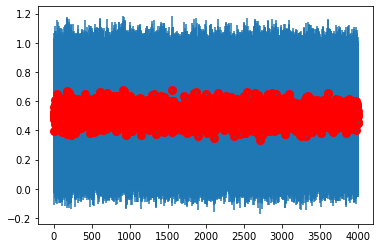

In [40]:
plt.errorbar(prob.index, prob.values, yerr=mean, marker=".", mec="red", ms=10, mew=4)